In [1]:
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz
from sklearn.metrics import r2_score

In [6]:
df = pd.read_csv('Data/bs140513_032310.csv')

In [115]:
df.head(10)

step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2     0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3     0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
4     0   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   
5     0  'C1315400589'  '3'    'F'    '28007'   'M348934600'     '28007'   
6     0   'C765155274'  '1'    'F'    '28007'   'M348934600'     '28007'   
7     0   'C202531238'  '4'    'F'    '28007'   'M348934600'     '28007'   
8     0   'C105845174'  '3'    'M'    '28007'   'M348934600'     '28007'   
9     0    'C39858251'  '5'    'F'    '28007'   'M348934600'     '28007'   

              category  amount  fraud  
0  'es_transportation'    4.55      0  
1  'es_transportation'   39.68      0  
2  'es_transportation'   26.89      0  
3  'es_transportation'   17.25      0  
4  'es_transportation'   35.72      0  
5  'es_transportation'   25.81      0  
6  'es_transportation'    9.10      0  
7  'es_transportation'   21.17      0  
8  'es_transportation'   32.40      0  
9  'es_transportation'   35.40      0

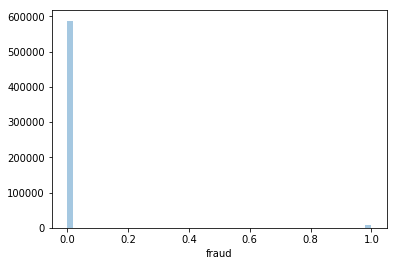

In [9]:
sns.distplot(df['fraud'], kde=False)

In [10]:
df.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [146]:
X = [['step', 'zipcodeOri',
       'zipMerchant', 'amount']]

In [160]:
df['zipcodeOri'] = df['zipcodeOri'].replace({"'":''},regex = True)

In [177]:
df['zipMerchant'] = df['zipMerchant'].replace({"'":''},regex = True)

In [165]:
df['age'] = df['age'].replace({"'":''},regex = True)

In [212]:
df['step'] = df['step'].replace({'',0},regex = True)

In [213]:
df['zipcodeOri'] = df['zipcodeOri'].replace({'':0},regex = True)

In [214]:
df['zipMerchant'] = df['zipMerchant'].replace({'':0},regex = True)

In [215]:
df['age'] = df['age'].replace({'':0},regex = True)

In [216]:
X = df.drop(df.columns[[1,3,5, 7, 9]], axis=1)

In [217]:
X.shape

(594643, 5)

In [218]:
X.head(100)

step age zipcodeOri zipMerchant  amount
0      0   4      28007       28007    4.55
1      0   2      28007       28007   39.68
2      0   4      28007       28007   26.89
3      0   3      28007       28007   17.25
4      0   5      28007       28007   35.72
5      0   3      28007       28007   25.81
6      0   1      28007       28007    9.10
7      0   4      28007       28007   21.17
8      0   3      28007       28007   32.40
9      0   5      28007       28007   35.40
10     0   4      28007       28007   14.95
11     0   1      28007       28007    1.51
12     0   3      28007       28007   68.79
13     0   5      28007       28007   20.32
14     0   3      28007       28007   13.56
15     0   3      28007       28007   30.19
16     0   4      28007       28007   17.54
17     0   5      28007       28007   40.69
18     0   2      28007       28007   21.21
19     0   2      28007       28007   10.09
20     0   2      28007       28007   19.31
21     0   2      28007       28007   44.22
22     0   5      28007       28007   44.39
23     0   5      28007       28007   30.72
24     0   2      28007       28007   29.84
25     0   3      28007       28007   12.10
26     0   4      28007       28007   24.84
27     0   2      28007       28007   16.42
28     0   5      28007       28007    2.19
29     0   5      28007       28007   32.27
..   ...  ..        ...         ...     ...
70     0   4      28007       28007    2.96
71     0   2      28007       28007   44.69
72     0   2      28007       28007    5.01
73     0   2      28007       28007    9.74
74     0   2      28007       28007   10.10
75     0   4      28007       28007   58.64
76     0   2      28007       28007   29.20
77     0   2      28007       28007   32.60
78     0   2      28007       28007   52.35
79     0   2      28007       28007  159.92
80     0   3      28007       28007   26.37
81     0   2      28007       28007   49.07
82     0   2      28007       28007   35.74
83     0   5      28007       28007   47.53
84     0   5      28007       28007   29.87
85     0   2      28007       28007   20.31
86     0   3      28007       28007   10.59
87     0   2      28007       28007   21.92
88     0   3      28007       28007   44.26
89     0   3      28007       28007  324.50
90     0   1      28007       28007   26.07
91     0   2      28007       28007   10.88
92     0   4      28007       28007    8.05
93     0   3      28007       28007   25.59
94     0   5      28007       28007   15.26
95     0   3      28007       28007   20.73
96     0   1      28007       28007   68.17
97     0   3      28007       28007   34.75
98     0   2      28007       28007  171.07
99     0   6      28007       28007   50.31

[100 rows x 5 columns]

In [219]:
Y= df[df.columns[:1]]

In [220]:
Y.head(10)

step
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0

In [221]:
X.shape

(594643, 5)

In [222]:
Y.shape

(594643, 1)

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [224]:
dtr = tree.DecisionTreeRegressor(max_depth=4)

In [225]:
dtr = dtr.fit(X_train, y_train)

In [226]:
y_train_predict = dtr.predict(X_train)

In [227]:
y_test_predict = dtr.predict(X_test)

In [228]:
from sklearn.metrics import r2_score

In [229]:
r2_score(y_train, y_train_predict)

0.9959952162857809

In [230]:
r2_score(y_test, y_test_predict)

0.9959925586573121